In [2]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/260.1 kB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 92.2/260.1 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 204.8/260.1 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  256.0/260.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 260.1/260.1 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.1/1.0 MB 3.0 MB/s eta 0:00:01
   --------- ------------------------------ 0.2/1.0 MB 3.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.0 MB 4.0 MB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.0 MB 3.8 MB/s eta 0:00:01
   -------

In [3]:
# Load the data
def load_data(audio_dir):
    labels = []
    features = []

    for audio_file in os.listdir(audio_dir):
        if audio_file.endswith(".wav"):
            file_path = os.path.join(audio_dir, audio_file)
            label = audio_file.split('_')[0]
            labels.append(label)

            # Extract MFCC features
            audio, sr = librosa.load(file_path, mono=True, duration=5)
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            features.append(np.mean(mfccs, axis=1))

    return np.array(features), np.array(labels)

In [4]:
# Extract features
audio_dir = "C:\\Users\\AL-alamia\\Desktop\\College\\Speech\\Assignment1\\cats_dogs"

features, labels = load_data(audio_dir)

In [5]:
# Preprocess the data
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

In [6]:
# Build the model
model = Sequential()
model.add(Dense(128, input_shape=(features.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\AL-alamia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.4273 - loss: 7.9104 - val_accuracy: 0.5652 - val_loss: 2.9964
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5720 - loss: 1.9236 - val_accuracy: 0.7391 - val_loss: 1.1345
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7457 - loss: 1.2288 - val_accuracy: 0.9130 - val_loss: 0.2115
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8183 - loss: 0.6091 - val_accuracy: 0.9130 - val_loss: 0.2702
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8778 - loss: 0.4676 - val_accuracy: 0.8261 - val_loss: 0.4016
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8765 - loss: 0.3392 - val_accuracy: 0.9130 - val_loss: 0.2295
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8904 - loss: 0.3233 - val_accuracy: 0.7826 - val_loss: 0.2858
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8548 - loss: 0.3595 - val_accuracy: 0.9130 - val_loss: 0.2225
Epoch

In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9658 - loss: 0.0939 
Test Loss: 0.09436700493097305, Test Accuracy: 0.9642857313156128


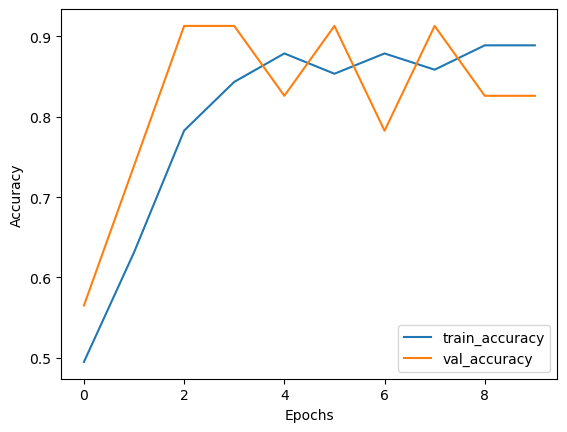

In [9]:
# Plot training history

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.96      0.96      0.96        24

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56

